In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functions import load_imdb_dataset
from neural_network import Neural_network
from sklearn.model_selection import train_test_split

In [2]:
X, y, label_encoder = load_imdb_dataset("IMDB Dataset.csv")
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.2, random_state=42)
X_train, X_test = X_train.T, X_test.T
y_train, y_test = y_train.T, y_test.T

In [3]:
print("y_train unique:", np.unique(y_train))
print("y_train shape:", y_train.shape)
print("x_train_shape:", X_train.shape)

y_train unique: [0 1]
y_train shape: (1, 40000)
x_train_shape: (5000, 40000)


In [4]:
print("y_test unique:", np.unique(y_test))
print("y_test shape:", y_test.shape)
print("x_test_shape:", X_test.shape)

y_test unique: [0 1]
y_test shape: (1, 10000)
x_test_shape: (5000, 10000)


In [ ]:
results = {}
optimizers = ["adam", "momentum", "rmsprop", "gradient_descent"]
layer_dims = [X_train.shape[0], 512, 256, 128, 64, y_train.shape[0]]

for opt in optimizers:
    print(f"Training with optimizer: {opt}")
    model = Neural_network(
        num_layers=len(layer_dims) - 1,
        layer_dims=layer_dims,
        task="binary",
        activation="relu",
        optimizer=opt,
        initialization="he",
        regularization="l2",
        lambd=0.01,
        dropout_keep_prob = 1.0,
        learning_rate = 0.01,
        num_epochs=100,
        decay_rate=0.001
    )

    loss_history = model.fit(X_train, y_train, track_loss=True, log_every=10)

    predictions = model.predict(X_test)
    if model.task == "binary":
        acc = np.mean(predictions == y_test)
    else:
        true_labels = np.argmax(y_test, axis=0)
        acc = np.mean(predictions == true_labels)
    results[opt] = {
        "loss": loss_history,
        "accuracy": acc
    }
    print(f"{opt} → Final Accuracy: {acc:.4f}")

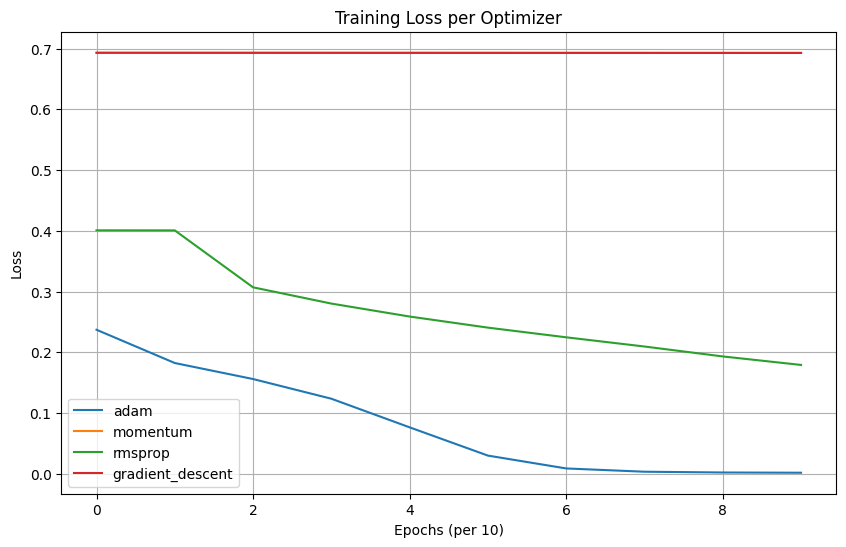

In [ ]:
plt.figure(figsize=(10, 6))
for opt in optimizers:
    plt.plot(results[opt]["loss"], label=opt)
plt.title("Training Loss per Optimizer")
plt.xlabel("Epochs (per 10)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for opt in optimizers:
    print(f"{opt}: {results[opt]['accuracy']:.4f}")

adam: 0.8665
momentum: 0.5189
rmsprop: 0.8818
gradient_descent: 0.5284


In [7]:
from functions import load_glove_embeddings

glove_path = "./glove.6B/glove.6B.100d.txt"
glove_embeddings = load_glove_embeddings(glove_path)

print(f"Loaded {len(glove_embeddings)} word vectors.")

Loaded 400000 word vectors.


In [10]:
import importlib
import functions as F
import pandas as pd
from sklearn.preprocessing import LabelEncoder

importlib.reload(F)

df = pd.read_csv("./IMDB Dataset.csv")

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])

X = [F.sentence_to_glove_vector(sentence, glove_embeddings, embedding_dim=100) for sentence in df['review']]
X = np.array(X).T   # (embedding_dim, n_samples)
y = y.reshape(1, -1)  # (1, n_samples)

# Correct for sklearn
X_for_split = X.T   # (n_samples, embedding_dim)
y_for_split = y.T   # (n_samples, 1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_for_split, y_for_split, test_size=0.2, random_state=42)

# Transpose back for custom NN
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [11]:
results = {}
optimizers = ["adam", "momentum", "rmsprop", "gradient_descent"]
layer_dims = [X_train.shape[0], 512, 256, 128, 64, y_train.shape[0]]

for opt in optimizers:
    print(f"Training with optimizer: {opt}")
    model = Neural_network(
        num_layers=len(layer_dims) - 1,
        layer_dims=layer_dims,
        task="binary",
        activation="relu",
        optimizer=opt,
        initialization="he",
        regularization="l2",
        lambd=0.01,
        dropout_keep_prob = 1.0,
        learning_rate = 0.01,
        num_epochs=200,
        decay_rate=0.001
    )

    loss_history = model.fit(X_train, y_train, track_loss=True, log_every=10)

    predictions = model.predict(X_test)
    if model.task == "binary":
        acc = np.mean(predictions == y_test)
    else:
        true_labels = np.argmax(y_test, axis=0)
        acc = np.mean(predictions == true_labels)
    results[opt] = {
        "loss": loss_history,
        "accuracy": acc
    }
    print(f"{opt} → Final Accuracy: {acc:.4f}")

Training with optimizer: adam
Epoch 10/200 - Cost: 0.6921
Epoch 20/200 - Cost: 0.6686
Epoch 30/200 - Cost: 0.6248
Epoch 40/200 - Cost: 0.5624
Epoch 50/200 - Cost: 0.5216
Epoch 60/200 - Cost: 0.5086
Epoch 70/200 - Cost: 0.5036
Epoch 80/200 - Cost: 0.4863
Epoch 90/200 - Cost: 0.4907
Epoch 100/200 - Cost: 0.4765
Epoch 110/200 - Cost: 0.4715
Epoch 120/200 - Cost: 0.4705
Epoch 130/200 - Cost: 0.4746
Epoch 140/200 - Cost: 0.4817
Epoch 150/200 - Cost: 0.4635
Epoch 160/200 - Cost: 0.4608
Epoch 170/200 - Cost: 0.4617
Epoch 180/200 - Cost: 0.4738
Epoch 190/200 - Cost: 0.4631
Epoch 200/200 - Cost: 0.4604
adam → Final Accuracy: 0.7811
Training with optimizer: momentum
Epoch 10/200 - Cost: 0.6934
Epoch 20/200 - Cost: 0.6928
Epoch 30/200 - Cost: 0.6887
Epoch 40/200 - Cost: 0.6854
Epoch 50/200 - Cost: 0.6835
Epoch 60/200 - Cost: 0.6816
Epoch 70/200 - Cost: 0.6794
Epoch 80/200 - Cost: 0.6778
Epoch 90/200 - Cost: 0.6766
Epoch 100/200 - Cost: 0.6755
Epoch 110/200 - Cost: 0.6744
Epoch 120/200 - Cost: 0.6

/Users/khangdo/Desktop/sentimen classification/functions.py:134: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


Epoch 10/200 - Cost: 9.1940
Epoch 20/200 - Cost: 1.2476
Epoch 30/200 - Cost: 1.1607
Epoch 40/200 - Cost: 0.7033
Epoch 50/200 - Cost: 0.6685
Epoch 60/200 - Cost: 0.6662
Epoch 70/200 - Cost: 0.6630
Epoch 80/200 - Cost: 0.6620
Epoch 90/200 - Cost: 0.6946
Epoch 100/200 - Cost: 0.6582
Epoch 110/200 - Cost: 0.6562
Epoch 120/200 - Cost: 0.6543
Epoch 130/200 - Cost: 0.6521
Epoch 140/200 - Cost: 0.6500
Epoch 150/200 - Cost: 0.6478
Epoch 160/200 - Cost: 0.6457
Epoch 170/200 - Cost: 0.6443
Epoch 180/200 - Cost: 0.6421
Epoch 190/200 - Cost: 0.6398
Epoch 200/200 - Cost: 0.6375
rmsprop → Final Accuracy: 0.6751
Training with optimizer: gradient_descent
Epoch 10/200 - Cost: 0.6895
Epoch 20/200 - Cost: 0.6862
Epoch 30/200 - Cost: 0.6842
Epoch 40/200 - Cost: 0.6827
Epoch 50/200 - Cost: 0.6815
Epoch 60/200 - Cost: 0.6804
Epoch 70/200 - Cost: 0.6795
Epoch 80/200 - Cost: 0.6787
Epoch 90/200 - Cost: 0.6777
Epoch 100/200 - Cost: 0.6766
Epoch 110/200 - Cost: 0.6756
Epoch 120/200 - Cost: 0.6746
Epoch 130/200 -

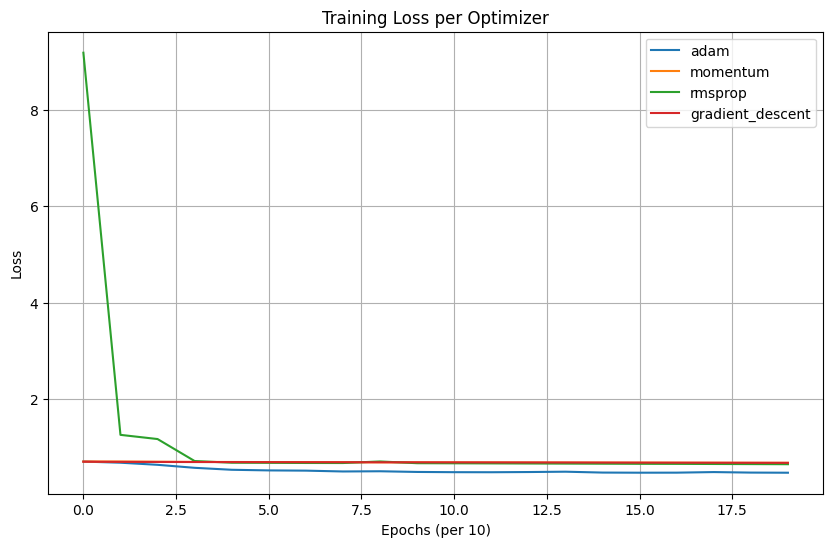

In [12]:
plt.figure(figsize=(10, 6))
for opt in optimizers:
    plt.plot(results[opt]["loss"], label=opt)
plt.title("Training Loss per Optimizer")
plt.xlabel("Epochs (per 10)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()